In [ ]:
#!pip uninstall -y ukko

Found existing installation: ukko 0.1.0
Uninstalling ukko-0.1.0:
  Successfully uninstalled ukko-0.1.0


In [2]:
pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///users/ericfey1/github/ukko
  Installing build dependencies ...done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... one
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ukko (pyproject.toml) ... done
  Created wheel for ukko: filename=ukko-0.1.0-py3-none-any.whl size=1088 sha256=ecf792c0a5f0ba587d1f251fb19a246789501725ec70f3b0c387eb4910a892fa
  Stored in directory: /tmp/ericfey1/27577474/pip-ephem-wheel-cache-fn4ppv1f/wheels/d6/05/1b/87b6398b4c9fcb6c3490d41e36b033368cd35528f738f0e67e
Successfully built ukko
  Attempting uninstall: ukko
    Found existing installation: ukko 0.1.0
    Uninstalling ukko-0.1.0:
      Successfully uninstalled ukko-0.1.0

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --u

In [3]:
import ukko 
import importlib

importlib.reload(ukko.core)
importlib.reload(ukko.tests_core)

ukko.tests_core.test_ClassificationHead_new()


AttributeError: module 'ukko.core' has no attribute 'ClassificationHead_new'

# torchsurv

https://github.com/Novartis/torchsurv

```sh
pip install torchsurv
```


In [ ]:
#pip install torchsurv

https://github.com/Novartis/torchsurv/blob/main/docs/notebooks/helpers_introduction.py

In [ ]:
class Custom_dataset(Dataset):
    """ "Custom dataset for the GSBG2 brain cancer dataset"""

    # defining values in the constructor
    def __init__(self, df: pd.DataFrame):
        self.df = df

    # Getting data size/length
    def __len__(self):
        return len(self.df)

    # Getting the data samples
    def __getitem__(self, idx):
        sample = self.df.iloc[idx]
        # Targets
        event = torch.tensor(sample["cens"]).bool()
        time = torch.tensor(sample["time"]).float()
        # Predictors
        x = torch.tensor(sample.drop(["cens", "time"]).values).float()
        return x, (event, time)

In [11]:
from torchsurv.loss import cox
from torchsurv.metrics.cindex import ConcordanceIndex

# Dummy data, random:
import torch
_ = torch.manual_seed(52)
n = 64
x = torch.randn((n, 16))
event = torch.randint(low=0, high=2, size=(n,)).bool()
time = torch.randint(low=1, high=100, size=(n,)).float()

In [12]:
print(f"Number of samples: {x.shape}")

Number of samples: torch.Size([64, 16])


Text(0.5, 0, 'Time (rnd)')

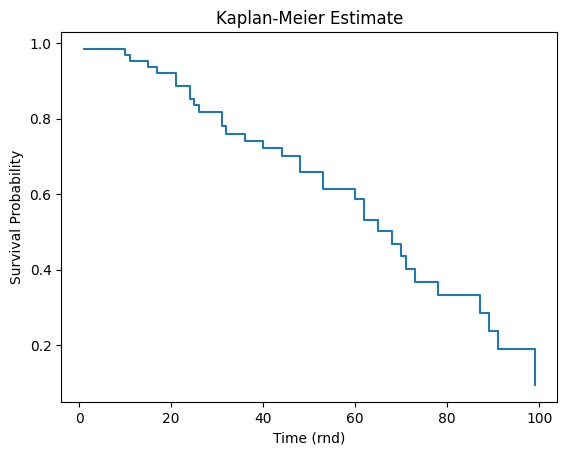

In [10]:
#import lifelines
import matplotlib.pyplot as plt
from torchsurv.stats.kaplan_meier import KaplanMeierEstimator

# Create a Kaplan-Meier estimator
km = KaplanMeierEstimator()

# Compute the estimator
km(event, time)

#  Accept *kwarks from matplotlib.pyplot.plot 
km.plot_km()
#plt.autoscale(True)
plt.xlabel("Time (rnd)")

In [8]:
# Cox proportional hazards model
from torch import nn
model_cox = nn.Sequential(nn.Linear(16, 1))
log_hz = model_cox(x)
print(log_hz.shape)
#torch.Size([64, 1])

from torchsurv.loss.cox import neg_partial_log_likelihood
loss = neg_partial_log_likelihood(log_hz, event, time)
print(loss)
#tensor(4.1723, grad_fn=<DivBackward0>)

from torchsurv.metrics.cindex import ConcordanceIndex
with torch.no_grad(): log_hz = model_cox(x)
cindex = ConcordanceIndex()
print(cindex(log_hz, event, time))
#tensor(0.4872)

from torchsurv.metrics.auc import Auc
new_time = torch.tensor(50.)
auc = Auc()
print(auc(log_hz, event, time, new_time=50))
#tensor([0.4737])

torch.Size([64, 1])
tensor(4.1723, grad_fn=<DivBackward0>)
tensor(0.4872)
tensor([0.4737])


/users/ericfey1/.local/lib/python3.11/site-packages/torchsurv/loss/cox.py:138: UserWarning: Ties in event time detected; using efron's method to handle ties.
  warnings.warn(


## AFT - Weibull

In [3]:
from torch import nn
model_weibull = nn.Sequential(nn.Linear(16, 2))
log_params = model_weibull(x)
print(log_params.shape)
#torch.Size([64, 2])

from torchsurv.loss.weibull import neg_log_likelihood
loss = neg_log_likelihood(log_params, event, time)
print(loss)
#tensor(82931.5078, grad_fn=<DivBackward0>)

# Log hazard and survivla functions:
from torchsurv.loss.weibull import log_hazard
from torchsurv.loss.weibull import survival_function

with torch.no_grad(): log_params = model_weibull(x)
log_hz = log_hazard(log_params, time)
print(log_hz.shape)
#torch.Size([64, 64])

surv = survival_function(log_params, time)
print(surv.shape)
#torch.Size([64, 64])
display(surv)

from torchsurv.metrics.cindex import ConcordanceIndex
cindex = ConcordanceIndex()
print(cindex(log_hz, event, time))
#tensor(0.4062)

from torchsurv.metrics.auc import Auc
new_time = torch.tensor(50.)
log_hz_t = log_hazard(log_params, time=new_time)
auc = Auc()
print(auc(log_hz_t, event, time, new_time=new_time))
#tensor([0.3509])

from torchsurv.metrics.brier_score import BrierScore
brier_score = BrierScore()
bs = brier_score(surv, event, time)
print(brier_score.integral())
#tensor(0.4447)

torch.Size([64, 2])
tensor(60258648., grad_fn=<DivBackward0>)
torch.Size([64, 64])
torch.Size([64, 64])


tensor([[4.2737e-05, 1.7822e-04, 3.0994e-06,  ..., 1.7643e-05, 1.7733e-01,
         2.0862e-06],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 2.9417e-01,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 6.6566e-04,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 1.9078e-02,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 2.4758e-02,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 1.4008e-01,
         0.0000e+00]])

tensor(0.5137)
tensor([0.4965])
tensor(0.4548)
